# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
data = pd.read_csv("ionosphere_data.csv")

In [3]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [10]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
data['label']=labelencode.fit_transform(data['label'])

In [13]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [14]:
x = (data.iloc[:, 0:34])
y = (data.iloc[:, 34])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42) 

In [15]:
print(data.shape)
print(x_train.shape)
print(x_test.shape)

(351, 35)
(210, 34)
(141, 34)


# model

In [19]:
model= Sequential()
model.add(Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history= model.fit(x_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 997us/step - loss: 0.9821 - accuracy: 0.2975
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.8305 - accuracy: 0.3230
Epoch 3/100
7/7 [==============================] - 0s 836us/step - loss: 0.7259 - accuracy: 0.4134
Epoch 4/100
7/7 [==============================] - 0s 992us/step - loss: 0.6606 - accuracy: 0.6513
Epoch 5/100
7/7 [==============================] - 0s 997us/step - loss: 0.6141 - accuracy: 0.8173
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.7873
Epoch 7/100
7/7 [==============================] - 0s 831us/step - loss: 0.5294 - accuracy: 0.7953
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.8299
Epoch 9/100
7/7 [==============================] - 0s 835us/step - loss: 0.4780 - accuracy: 0.8240
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7962
Epoch 11/100
7/7 

7/7 [==============================] - 0s 997us/step - loss: 0.0605 - accuracy: 0.9889
Epoch 85/100
7/7 [==============================] - 0s 997us/step - loss: 0.0460 - accuracy: 0.9921
Epoch 86/100
7/7 [==============================] - 0s 831us/step - loss: 0.0570 - accuracy: 0.9825
Epoch 87/100
7/7 [==============================] - 0s 997us/step - loss: 0.0633 - accuracy: 0.9887
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9906
Epoch 89/100
7/7 [==============================] - 0s 831us/step - loss: 0.0486 - accuracy: 0.9887
Epoch 90/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9864
Epoch 91/100
7/7 [==============================] - 0s 831us/step - loss: 0.0524 - accuracy: 0.9846
Epoch 92/100
7/7 [==============================] - 0s 997us/step - loss: 0.0698 - accuracy: 0.9838
Epoch 93/100
7/7 [==============================] - 0s 997us/step - loss: 0.0569 - accuracy: 0.9879
Epoch 94/100
7/7 

In [26]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

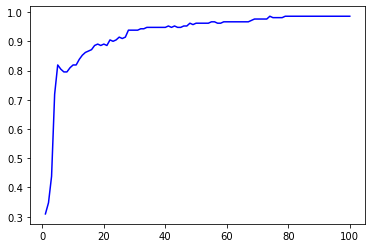

In [27]:
import matplotlib.pyplot as plt
acc=history_dict['accuracy']

epochs=range(1,len(loss)+1)
plt.plot(epochs,acc,'b',label='acc')


after 69 epochs model become overfit (so we train the model till 69 epochs)

In [29]:
model= Sequential()
model.add(Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history= model.fit(x_train,y_train,epochs=69)

Epoch 1/69
7/7 [==============================] - 1s 997us/step - loss: 0.6691 - accuracy: 0.6701
Epoch 2/69
7/7 [==============================] - 0s 889us/step - loss: 0.6203 - accuracy: 0.6491
Epoch 3/69
7/7 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.6665
Epoch 4/69
7/7 [==============================] - 0s 831us/step - loss: 0.5565 - accuracy: 0.7458
Epoch 5/69
7/7 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7228
Epoch 6/69
7/7 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.7588
Epoch 7/69
7/7 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7498
Epoch 8/69
7/7 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7949
Epoch 9/69
7/7 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.7986
Epoch 10/69
7/7 [==============================] - 0s 993us/step - loss: 0.4932 - accuracy: 0.8236
Epoch 11/69
7/7 [==============

In [30]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 748us/step - loss: 0.2240 - accuracy: 0.9220


[0.22404581308364868, 0.9219858050346375]

In [31]:
model.predict(x_test)

array([[9.7361302e-01],
       [9.8486114e-01],
       [9.9808764e-01],
       [7.5076711e-01],
       [9.7885817e-01],
       [9.6034646e-01],
       [9.3292314e-01],
       [9.9751151e-01],
       [9.4648075e-01],
       [9.9073774e-01],
       [9.6274698e-01],
       [8.6584061e-02],
       [1.5856326e-02],
       [8.6935186e-01],
       [9.9350083e-01],
       [9.6977615e-01],
       [9.9152660e-01],
       [6.6869259e-03],
       [9.9391741e-01],
       [7.3909461e-03],
       [9.2669123e-01],
       [1.2640744e-02],
       [1.7014146e-04],
       [9.3732482e-01],
       [9.5954454e-01],
       [8.2523346e-01],
       [2.5475949e-02],
       [1.9351929e-02],
       [7.4671209e-03],
       [9.8729485e-01],
       [9.4009590e-01],
       [9.8962235e-01],
       [9.8577082e-01],
       [9.8732388e-01],
       [9.9675703e-01],
       [5.0108829e-06],
       [7.2820669e-01],
       [9.8737276e-01],
       [8.9293718e-03],
       [9.9861330e-01],
       [9.9566114e-01],
       [9.661192

157    1
342    1
316    1
234    0
155    1
      ..
172    0
175    1
232    0
340    1
92     1
Name: label, Length: 141, dtype: int32